In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("default")

In [2]:
c = 3 * 1e8  # speed of light

def calc_latency(x, 
                 l, 
                 bandwidth=1e9, 
                 packet_size=100):
    sending_overhead = (x + 0.05 * 1e-9)
    
    receiving_overhead = ((4 / 3) * x + 0.05 * 1e-9)
    
    data_speed = (2 / 3) * c
    time_of_flight = l / data_speed
    transport_latency = packet_size / bandwidth + time_of_flight
    
    total_latency = sending_overhead + receiving_overhead + transport_latency
    
    return total_latency

In [3]:
x_values = np.array([0., 0.3, 3, 30]) * 1e-6  # seconds
lengths = np.array([0.5 * 1e-2, 5, 5000, 5000 * 1e3])  # meters

for x, l in zip(x_values, lengths):
    print(f"Latency for (l = {l}m) = \t{calc_latency(x, l):.6} s")

Latency for (l = 0.005m) = 	1.00125e-07 s
Latency for (l = 5.0m) = 	8.251e-07 s
Latency for (l = 5000.0m) = 	3.21001e-05 s
Latency for (l = 5000000.0m) = 	0.0250701 s


In [4]:
def calc_transmission_time(packet_size, 
                           bandwidth=1e9):
    transmission_time = packet_size / bandwidth
    return transmission_time

def calc_eff_bandwidth(packet_size, 
                       sending_overhead=0., 
                       receiving_overhead=0., 
                       transmission_time=0.):
    overhead = max(sending_overhead, receiving_overhead)
    eff_bandwidth = (2 * packet_size) / max(overhead, transmission_time)
    return eff_bandwidth

# Plots

In [5]:
def TT(N, l, use_ns=True):
    transmission_time = l * N / ((2 / 3) * c)
    if use_ns:  # convert to ns
        transmission_time *= 1e9
    return transmission_time

# switch functions
def TA_share(N):
    return 2.5 * N
TR_share = TS_share = 2.5

def latency_shared(N, l):
    print(TT(N, l), TA_share(N), TR_share, TS_share)
    all_Ts = TA_share(N) + TR_share + TS_share  # + TT(N, l)
    return all_Ts

def sigma_share(N):
    return 1 / N

def eff_bandwith_share(N):
    ...

# share functions
def TA_switch(N):
    return 2.5 * np.log2(N)
TR_switch = TS_switch = TA_switch

def latency_switch(N, l):
    all_Ts = TA_switch(N) + TR_switch(N) + TS_switch(N)  # + TT(N, l)
    return all_Ts

def sigma_switch(N):
    return (np.log2(N) ** (-0.25))

def eff_bandwidth_switch(N):
    ...

In [6]:
nodes = np.array([2 ** n for n in np.arange(2, 10 + 1)])

print(TT(nodes, 0.5 * 1e-2))
print(TT(nodes, 5))

[ 0.1  0.2  0.4  0.8  1.6  3.2  6.4 12.8 25.6]
[  100.   200.   400.   800.  1600.  3200.  6400. 12800. 25600.]


[ 0.1  0.2  0.4  0.8  1.6  3.2  6.4 12.8 25.6] [  10.   20.   40.   80.  160.  320.  640. 1280. 2560.] 2.5 2.5
[  100.   200.   400.   800.  1600.  3200.  6400. 12800. 25600.] [  10.   20.   40.   80.  160.  320.  640. 1280. 2560.] 2.5 2.5


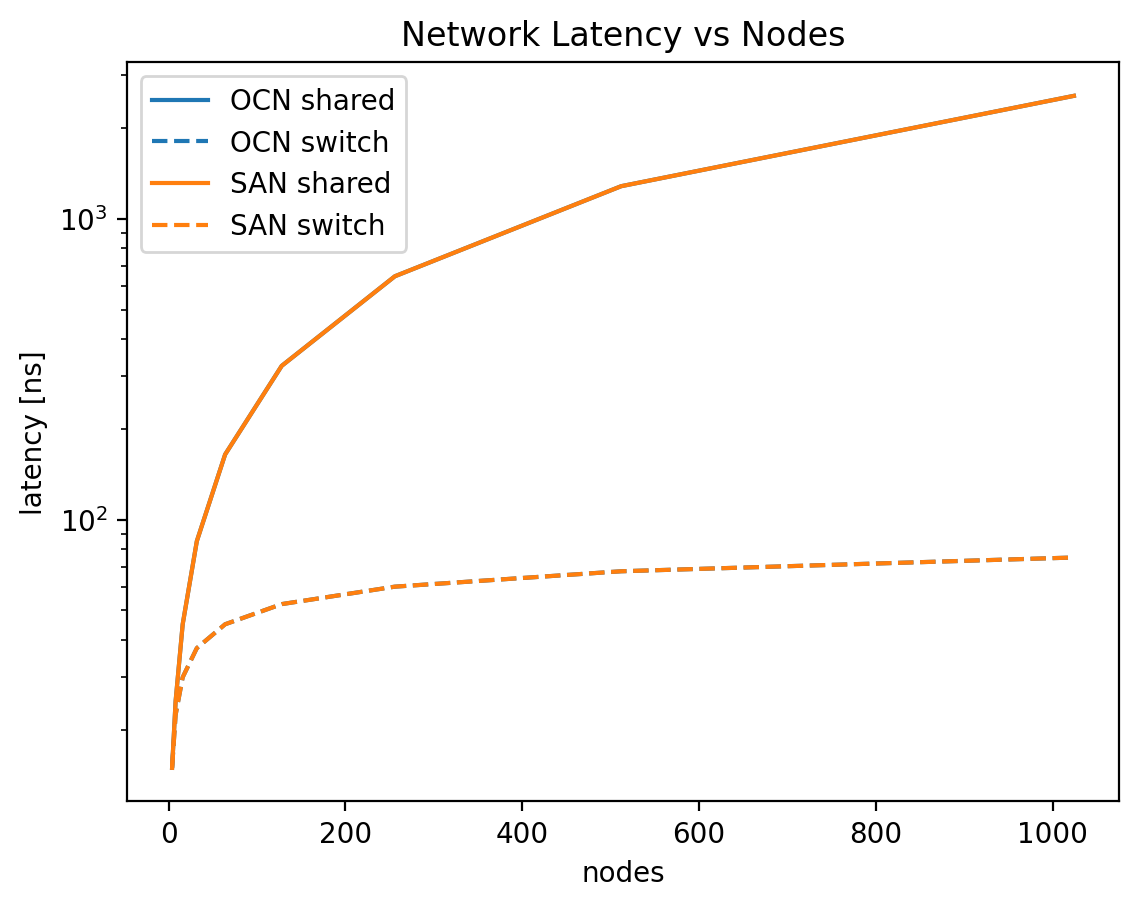

In [9]:
plt.figure(dpi=200)
plt.title("Network Latency vs Nodes")

plt.plot(nodes, latency_shared(nodes, 0.5 * 1e-2), color="tab:blue", linestyle="-" , label="OCN shared")
plt.plot(nodes, latency_switch(nodes, 0.5 * 1e-2), color="tab:blue", linestyle="--", label="OCN switch")
# plt.yscale("log")
# plt.show()

plt.plot(nodes, latency_shared(nodes, 5), color="tab:orange", linestyle="-" , label="SAN shared")
plt.plot(nodes, latency_switch(nodes, 5), color="tab:orange", linestyle="--", label="SAN switch")

plt.xlabel("nodes")
plt.ylabel("latency [ns]")
plt.yscale("log")
plt.legend()
plt.show()